In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/total.csv', sep=';')

In [ ]:
df['Price changes'] = df['Price changes'].apply(eval)
df['Price changes'] = [[element.replace('$', '') for element in sublist] for sublist in df['Price changes']]
#попросил сгенерить ChatGPT по запросу 'Как убрать знак из элементов списка находящегося в списке'
df['Price changes'] = [[float(element) for element in sublist] for sublist in df['Price changes']]

In [ ]:
df['Current discount'] = df['Current discount'].apply(lambda x: x.replace('%',''))
df[['Current discount']] = abs(df[['Current discount']].astype(int))

In [ ]:
df = df.rename(columns = {'Current discount' : 'Current discount in percent'})

In [ ]:
df['Current price'] = df['Current price'].apply(lambda x: x.replace('$',''))
df[['Current price']] = df[['Current price']].astype(float)

In [ ]:
df['Amount of recommendations'] = df['Amount of recommendations'].apply(lambda x: x.replace(',',''))
df[['Amount of recommendations']] = df[['Amount of recommendations']].astype(int)

In [ ]:
df

,Game title,Amount of recommendations,Current price,Current discount in percent,Price changes
0,Counter-Strike: Global Offensive,2999135,0.00,0,"[0.0, 14.99, 7.49, 14.99, 7.49, 14.99, 7.49, 1..."
1,PUBG: BATTLEGROUNDS,1382744,29.99,0,"[29.99, 14.99, 29.99, 14.99, 29.99, 14.99, 29...."
2,Rainbow Six Siege - Pro League Mute Set,710559,19.99,0,"[19.99, 19.99, 0.0, 7.99]"
3,Rainbow Six Siege - Pro League Bandit Set,710559,19.99,0,"[19.99, 19.99, 0.0, 7.99]"
4,Rainbow Six Siege - Pro League Thermite Set,710559,19.99,0,"[19.99, 19.99, 0.0, 7.99]"
...,...,...,...,...,...
10595,Micron,101,2.99,0,"[2.99, 0.89, 2.99, 0.89, 2.99, 0.89, 2.99, 0.8..."
10596,Haunted Past: Realm of Ghosts,101,4.99,0,"[4.99, 0.49, 4.99, 0.49, 4.99, 0.49, 4.99, 0.4..."
10597,Last Knight: Rogue Rider Edition,101,7.99,0,"[7.99, 1.59, 7.99, 1.59, 7.99, 1.59, 7.99, 1.5..."
10598,Saints Row IV - Hey Ash Whatcha Playin? Pack,101,1.99,0,"[1.99, 0.79, 1.99, 0.79, 1.99, 0.79, 1.99, 0.7..."


Несколько интересных фактов про цены сейчас

In [ ]:
cnt = 0
for i in df['Current price']:
  if int(i*100) % 100 == 99:
    cnt += 1
cnt

8244

Забавный факт, что в 8244 игре из 10600 цена является не круглой, а меньше на 1 цент (например, 19.99).

In [ ]:
df['Current price'].mode().values[0]

9.99

In [ ]:
df['Current price'].max()

259.35

In [ ]:
df['Current price'].min()

0.0

In [ ]:
round(df['Current price'].mean(), 2)

13.19

Интересно заметить, что наиболее популярная цена на игры среди выборки это 19.99, средняя - 22.15, максимальная - 259.35, минимальная - 0. Можно также обратить внимание, что в выборке данные распределены асимметрично, так как средняя цена больше моды на 4.20 долларов.

Интересно проверить, существует ли связь между количеством рекоммендаций игры и её текущей ценой. Для этого я построю диаграмму рассеивания.

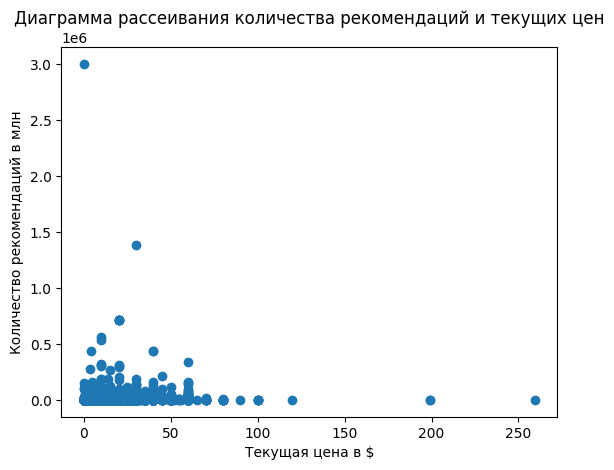

In [ ]:
plt.scatter(df['Current price'], df['Amount of recommendations'])
plt.title('Диаграмма рассеивания количества рекомендаций и текущих цен')
plt.xlabel('Текущая цена в $')
plt.ylabel('Количество рекомендаций в млн');

In [ ]:
rec_price_corr = df['Current price'].corr(df['Amount of recommendations'])
print(rec_price_corr)
df_prices = df_prices.fillna(method='ffill')
df_prices

0.057672672767162966


Как видно из графика корреляция между этими параметрами практически отсутствует, рассчитаная ниже корреляция Пирсона показывает наличие небольшой положительной связи. Также можно заметить, что в этих данных есть выбросы, причём как по цене, так и по количеству рекомендаций.

Далее хочется поработать с изменениями цен на игры. Для этого преобразуем колонку Price changes в отдельную таблицу.

In [ ]:
df_prices = df['Price changes'].apply(pd.Series).transpose()
df_prices.columns = df['Game title']
#Попросил сгенерить chatgpt по запросу "Как вытащить значения из списка и вставить каждое в отдельную ячейку другой таблицы"
df_prices

Game title,Counter-Strike: Global Offensive,PUBG: BATTLEGROUNDS,Rainbow Six Siege - Pro League Mute Set,Rainbow Six Siege - Pro League Bandit Set,Rainbow Six Siege - Pro League Thermite Set,Rainbow Six Siege - Pro League Ash Set,Tom Clancy's Rainbow Six Siege,Garry's Mod,Terraria,Rust,...,Run or Die,Alpha Zylon,Pixel Hunter,Khet 2.0,SPY Fox 2: Some Assembly Required,Micron,Haunted Past: Realm of Ghosts,Last Knight: Rogue Rider Edition,Saints Row IV - Hey Ash Whatcha Playin? Pack,Nancy Drew: The Captive Curse
0,0.00,29.99,19.99,19.99,19.99,19.99,19.99,9.99,9.99,39.99,...,4.99,4.99,2.99,9.99,6.99,2.99,4.99,7.99,1.99,6.99
1,14.99,14.99,19.99,19.99,19.99,19.99,19.99,6.69,4.99,26.79,...,0.49,0.49,0.89,1.99,3.49,0.89,0.49,1.59,0.79,3.49
2,7.49,29.99,0.00,0.00,0.00,0.00,19.99,9.99,9.99,39.99,...,4.99,4.99,2.99,9.99,6.99,2.99,4.99,7.99,1.99,6.99
3,14.99,14.99,7.99,7.99,7.99,7.99,7.99,6.69,4.99,26.79,...,0.49,0.99,0.89,1.99,3.49,0.89,0.49,1.59,0.79,4.54
4,7.49,29.99,NaN,NaN,NaN,NaN,19.99,9.99,9.99,39.99,...,4.99,4.99,2.99,9.99,6.99,2.99,4.99,7.99,1.99,6.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Получилась таблица, в которой названиями колонок выступают названия игр, а значения - цена в разные моменты времени. Значения находятся в порядке от самой поздней (текущей цены) к самой ранней (в момент выхода) цене. В данной таблице получились пропуски, так как у каждой игры могли быть свои индивидуальные акции, разные даты выхода и тд., пока что не буду трогать их.

Можно посмотреть, какие цены являются самыми популярными. Построим диаграмму с 20 самыми популярными значениями.

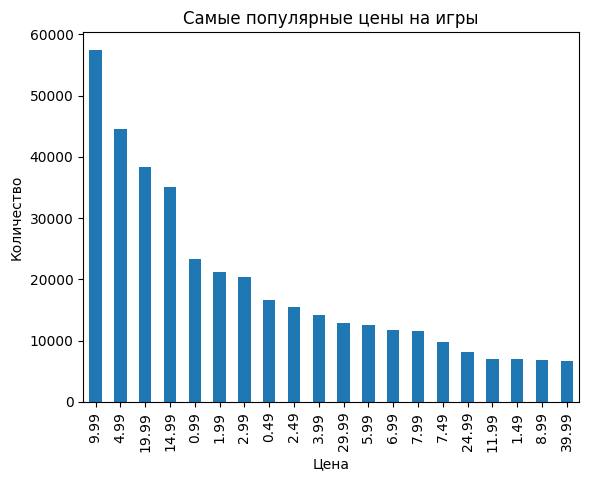

In [ ]:
popular = df_prices.stack().value_counts().nlargest(20)
popular.plot(kind='bar')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Самые популярные цены на игры');

Самая популярная цена это 9.99, затем 4.99, 19.99 и т.д. долларов

Теперь уберём строки, где у всех игр пропуски. Для удобства оставим 50 цен для каждого столбца.

In [ ]:
df_prices = df_prices.drop(df_prices.index[50 : 244])
df_prices

Game title,Counter-Strike: Global Offensive,PUBG: BATTLEGROUNDS,Rainbow Six Siege - Pro League Mute Set,Rainbow Six Siege - Pro League Bandit Set,Rainbow Six Siege - Pro League Thermite Set,Rainbow Six Siege - Pro League Ash Set,Tom Clancy's Rainbow Six Siege,Garry's Mod,Terraria,Rust,...,Run or Die,Alpha Zylon,Pixel Hunter,Khet 2.0,SPY Fox 2: Some Assembly Required,Micron,Haunted Past: Realm of Ghosts,Last Knight: Rogue Rider Edition,Saints Row IV - Hey Ash Whatcha Playin? Pack,Nancy Drew: The Captive Curse
0,0.00,29.99,19.99,19.99,19.99,19.99,19.99,9.99,9.99,39.99,...,4.99,4.99,2.99,9.99,6.99,2.99,4.99,7.99,1.99,6.99
1,14.99,14.99,19.99,19.99,19.99,19.99,19.99,6.69,4.99,26.79,...,0.49,0.49,0.89,1.99,3.49,0.89,0.49,1.59,0.79,3.49
2,7.49,29.99,0.00,0.00,0.00,0.00,19.99,9.99,9.99,39.99,...,4.99,4.99,2.99,9.99,6.99,2.99,4.99,7.99,1.99,6.99
3,14.99,14.99,7.99,7.99,7.99,7.99,7.99,6.69,4.99,26.79,...,0.49,0.99,0.89,1.99,3.49,0.89,0.49,1.59,0.79,4.54
4,7.49,29.99,NaN,NaN,NaN,NaN,19.99,9.99,9.99,39.99,...,4.99,4.99,2.99,9.99,6.99,2.99,4.99,7.99,1.99,6.99
5,14.99,14.99,NaN,NaN,NaN,NaN,9.89,6.69,4.99,26.79,...,0.49,0.49,0.89,0.99,3.49,0.89,0.49,1.59,0.79,4.19
6,7.49,29.99,NaN,NaN,NaN,NaN,19.99,9.99,9.99,39.99,...,4.99,4.99,2.99,9.99,6.99,2.99,4.99,7.99,1.99,6.99
7,14.99,14.99,NaN,NaN,NaN,NaN,7.99,4.99,4.99,26.79,...,0.49,0.99,1.49,2.49,2.79,0.89,0.49,1.59,0.79,4.19
8,10.04,29.99,NaN,NaN,NaN,NaN,19.99,9.99,9.99,39.99,...,4.99,4.99,2.99,9.99,6.99,2.99,4.99,7.99,1.99,6.99
9,14.99,14.99,NaN,NaN,NaN,NaN,7.99,4.99,4.99,19.99,...,0.49,0.49,0.89,2.49,2.79,0.89,0.99,1.59,0.79,2.09


В таблице до сих пор много пропусков. Для удобства заполним их средними по каждому столбцу.

In [ ]:
df_prices = df_prices.fillna(round(df_prices.mean(), 2))
df_prices

Game title,Counter-Strike: Global Offensive,PUBG: BATTLEGROUNDS,Rainbow Six Siege - Pro League Mute Set,Rainbow Six Siege - Pro League Bandit Set,Rainbow Six Siege - Pro League Thermite Set,Rainbow Six Siege - Pro League Ash Set,Tom Clancy's Rainbow Six Siege,Garry's Mod,Terraria,Rust,...,Run or Die,Alpha Zylon,Pixel Hunter,Khet 2.0,SPY Fox 2: Some Assembly Required,Micron,Haunted Past: Realm of Ghosts,Last Knight: Rogue Rider Edition,Saints Row IV - Hey Ash Whatcha Playin? Pack,Nancy Drew: The Captive Curse
0,0.00,29.99,19.99,19.99,19.99,19.99,19.99,9.99,9.99,39.99,...,4.99,4.99,2.99,9.99,6.99,2.99,4.99,7.99,1.99,6.99
1,14.99,14.99,19.99,19.99,19.99,19.99,19.99,6.69,4.99,26.79,...,0.49,0.49,0.89,1.99,3.49,0.89,0.49,1.59,0.79,3.49
2,7.49,29.99,0.00,0.00,0.00,0.00,19.99,9.99,9.99,39.99,...,4.99,4.99,2.99,9.99,6.99,2.99,4.99,7.99,1.99,6.99
3,14.99,14.99,7.99,7.99,7.99,7.99,7.99,6.69,4.99,26.79,...,0.49,0.99,0.89,1.99,3.49,0.89,0.49,1.59,0.79,4.54
4,7.49,29.99,11.99,11.99,11.99,11.99,19.99,9.99,9.99,39.99,...,4.99,4.99,2.99,9.99,6.99,2.99,4.99,7.99,1.99,6.99
5,14.99,14.99,11.99,11.99,11.99,11.99,9.89,6.69,4.99,26.79,...,0.49,0.49,0.89,0.99,3.49,0.89,0.49,1.59,0.79,4.19
6,7.49,29.99,11.99,11.99,11.99,11.99,19.99,9.99,9.99,39.99,...,4.99,4.99,2.99,9.99,6.99,2.99,4.99,7.99,1.99,6.99
7,14.99,14.99,11.99,11.99,11.99,11.99,7.99,4.99,4.99,26.79,...,0.49,0.99,1.49,2.49,2.79,0.89,0.49,1.59,0.79,4.19
8,10.04,29.99,11.99,11.99,11.99,11.99,19.99,9.99,9.99,39.99,...,4.99,4.99,2.99,9.99,6.99,2.99,4.99,7.99,1.99,6.99
9,14.99,14.99,11.99,11.99,11.99,11.99,7.99,4.99,4.99,19.99,...,0.49,0.49,0.89,2.49,2.79,0.89,0.99,1.59,0.79,2.09


Дальше хочу сделать предсказания цен на следующий период времени. Пока ещё думаю, какая модель здесь может подойти. Если подскажете, будет хорошо) Датасет большой, так что разгуляться есть куда.